In [1]:
import skimage
import skimage.io
import skimage.transform
import os
import numpy as np
import utils
import matplotlib.pyplot as plt

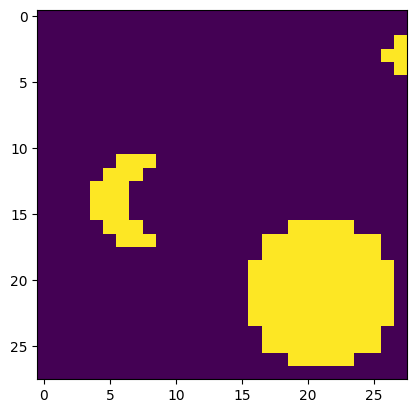

In [320]:
def local_circle_mask(im, r=50, c=(0, 0), val=0):
    curve = 0.75
    for i in range(int(max(0, c[0]-r)), int(min(c[0]+r+1, len(im)))):
        for j in range(int(max(0, c[1]-r)), int(min(c[1]+r+1, len(im[0])))):
            x = i-c[0]
            y = j-c[1]
            if np.sqrt(curve*(x)**2+curve*(y)**2) < r:
                im[i,j] = val
test_im = np.zeros((28,28))
local_circle_mask(test_im, 5, (21,21), 1)
local_circle_mask(test_im, 3, (14,7), 1)
local_circle_mask(test_im, 2, (14,9), 0)
local_circle_mask(test_im, 1, (3,27), 1)
plt.imshow(test_im)

In [347]:
def filter_circles_horizontal(im, gap=29, offset=0, circle_radius=2, center_ignore_radius=25):
    temp = np.ones_like(im)
    i = offset
    c = len(temp)//2
    while i < len(temp[0]):
        if abs(i-len(temp[0])//2) > center_ignore_radius:
            local_circle_mask(temp, r=circle_radius, c=(c,i), val=0)
        i += gap
    return temp

In [354]:
def do_filter(im, fft_kernel):
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    fft_im = np.fft.fft2(im)
    fft_im = np.fft.fftshift(fft_im)

    fft_result = fft_im * fft_kernel

    im_filtered = np.abs(np.fft.ifft2(fft_result))

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 5, 1)
    plt.imshow(im, cmap='gray')
    plt.subplot(1, 5, 2)
    plt.imshow(np.log1p(np.abs(fft_im)))
    plt.subplot(1, 5, 3)
    plt.imshow(np.log1p(np.abs(fft_kernel)))
    plt.subplot(1, 5, 4)
    plt.imshow(np.log1p(np.abs(fft_result)))
    plt.subplot(1, 5, 5)
    plt.imshow(im_filtered, cmap='gray')

    return im_filtered

Saving image to: image_processed\moon_filtered.png


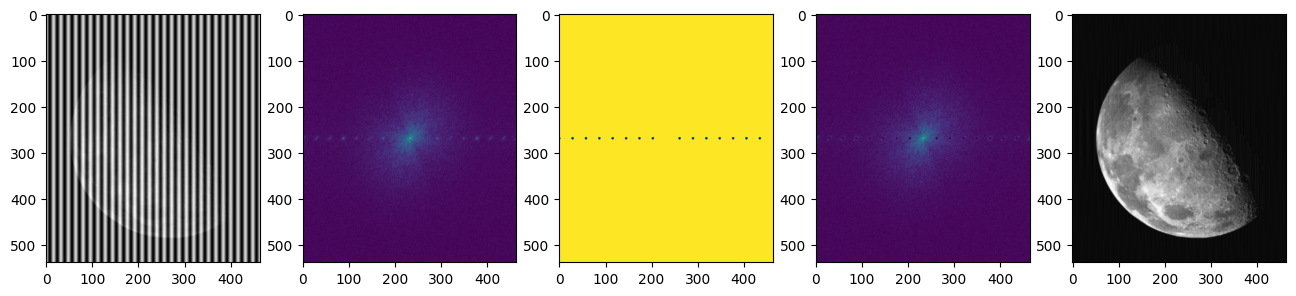

In [355]:
if __name__ == "__main__":
    # DO NOT CHANGE
    impath = os.path.join("images", "noisy_moon.png")
    im = utils.read_im(impath)

    ### START YOUR CODE HERE ### (You can change anything inside this block)

    im_filtered = do_filter(im, filter_circles_horizontal(im))
    
    ### END YOUR CODE HERE ###
    utils.save_im("moon_filtered.png", utils.normalize(im_filtered))